## To Do´s/Vorschläge:<br/>

**Agenda:**

1 Introduction to task and leading questions

2 Overview of dataset, assumptions and description of further procedure

3 Exploring dataset <br/>
3.1 Demographic Data <br/>
3.2 Personality Traits <br/>
3.3 Drug Data <br/>

4 Naive approach for checking assumptions


**Generell:**
- Plots vereinheitlichen (Farbe, Titel etc.)
- Beschreibung des Codes
- Ergebnisse/Insights festhalten

**Aufbau:**"Handling semer var" und "adding new drug column" zu 3.3 (habe ich hier schon gemacht)<br/>

**First Overview:** "inspecting variables" raus, Descriptive Statistics aufnehmen; Renaming columns<br/>, Beschreibung der Variablen?

**Assumptions:** Spezifizieren: Hypothesen nur für Illegal Drug abuse, dafür assumption 4 raus?<br/> 
Wollen wir als generelles Ziel verfolgen, herauszufinden, welche Gruppe an Schüler*innen in unserer Schule das höchste Risiko haben, später mal Drogen zu konsumieren?<br/> Dann könnten wir die Art der Schule festlegen, indem wir vl nur ein country anschauen und uns auf ein Education Level einigen? 

**3.3 Drug Use:** Erklären, warum wir semer ausschließen; erklären warum wir coffee and chocolat nicht einbeziehen, wie wir zw drug user und non-usern unterscheiden


#Agenda

# Introduction to task and leading question
Prevention of drug abuse - we´re part of the "Dorgeninformationszentrum" and often are invited to schools for giving talks about drug abuse and risk factors.
This time, a school (Klasse spezifizieren?Am besten frühe Klasse) in the UK asked us to talk to parents and teachers in order to encourage early prevention of later drug abuse. In particular, the topic of interest was to reveal features of pupils with highest risk for later drug abuse due to demographic data and certain personality traits. Goal of the talk is to raise awareness among teachers and parents in order to seize early prevention methods especially for those pupils who have a higher risk of later drug abuse.

Passt das so?
Was genau brauchen wir dafür?
Wenn wir zb nur UK sagen: Wir können ja davon ausgehen, dass die gesammeltne Daten auf alle Länder generalisierbar sind (und das ggf. damit belegen, dass wir keine Unterschiede in den Ländern sehen)
Wir dürfen nicht vergessen, dass unsere Schüler*innen jünger als die untersuchte Gruppe ist. WIe gehen wir damit um? Wir wollen aj Risikofakroten finden, dass diese Schüler*innen SPÄTER irgendwann Drogen konsumieren. IRGENDWANN oder wollen wir Risiko anschauen, dass sie direkt nach Schulabschluss (18-24) konsumieren?
Oder Risikofaktoren, WANN höchstes Risiko(Alter) und für welche Droge? Wie bringen wir Bildung mit rein?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 

In [4]:
sns.set_style("whitegrid")
sns.color_palette("muted", 10)
sns.set_palette("muted", 10)

In [5]:
drugs = pd.read_excel("drug_consumption.xls")

In [6]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [7]:
# Descriptive Statistics

#### Renaming columns

In [8]:
#Renaming Personality trait columns
drugs=drugs.rename(columns={"Escore":"Extraversion", "Nscore":"Neuroticism", "Oscore":"Openness", 
                      "Ascore":"Agreeableness","Cscore":"Conscientiousness", "Impulsive":"Impulsiveness",
                     "SS":"Sensation_Seeking"})

#### Describing Columns
- **Neuroticism**: Represents the predisposition to experience negative emotion and psychological distress.
- **Extraversion**: Tendency to be sociable, energetic, assertive, lively, and to experience positive emotions
- **Openness**: Consists of intellectual curiosity, creativity, aesthetic sensitivity, and having nondogmatic attitudes
- **Agreeableness**: Defined as how well one gets along with others. It includes being prosocial, altruistic, trusting, warm, and sympathetic
- **Conscientiousness**: Encompasses being responsible, dependable, disciplined, and organize´
- **Impulsiveness**: Predisposition toward rapid, unplanned reactions to internal or external stimuli regardless of negative consequences of these reactions for the impulsive individual or for others
- **Sensation Seeking**: Seeking of varied, novel, complex, and intense sensations and experiences, and the willingness to take physical, social, legal, and financial risks for the sake of such experience

## Assumptions

**1. :** Certain personality traits will be correlated with a drug abuse. 

**2. :** For example we expect that ```Sensation Seeking``` and ```Impulsivness``` will have higher correlations

**3. :** Depending on educational background, the substances used will differ.

**4. :** If you seperate legal from illegal drugs, the use rate of legal drugs will be higher in comparison to illegal drugs.

**5. :** Due to gender differences in personality traits, drug abuse between gender will differ. We expect that ```sensation seekin```
 will be higher for males and therefore the drug abuse for males will be higher.

**6. :** Personality traits will not be significantly different between the different ages

## Inspecting the variables

In [9]:
def plot_hist_numeric(df, figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8):
    df_num = df.select_dtypes(include = ['float', 'int'])
    df_num.hist(figsize=figsize, bins=bins, xlabelsize=xlabelsize, ylabelsize=ylabelsize);

## Plot the numerical data

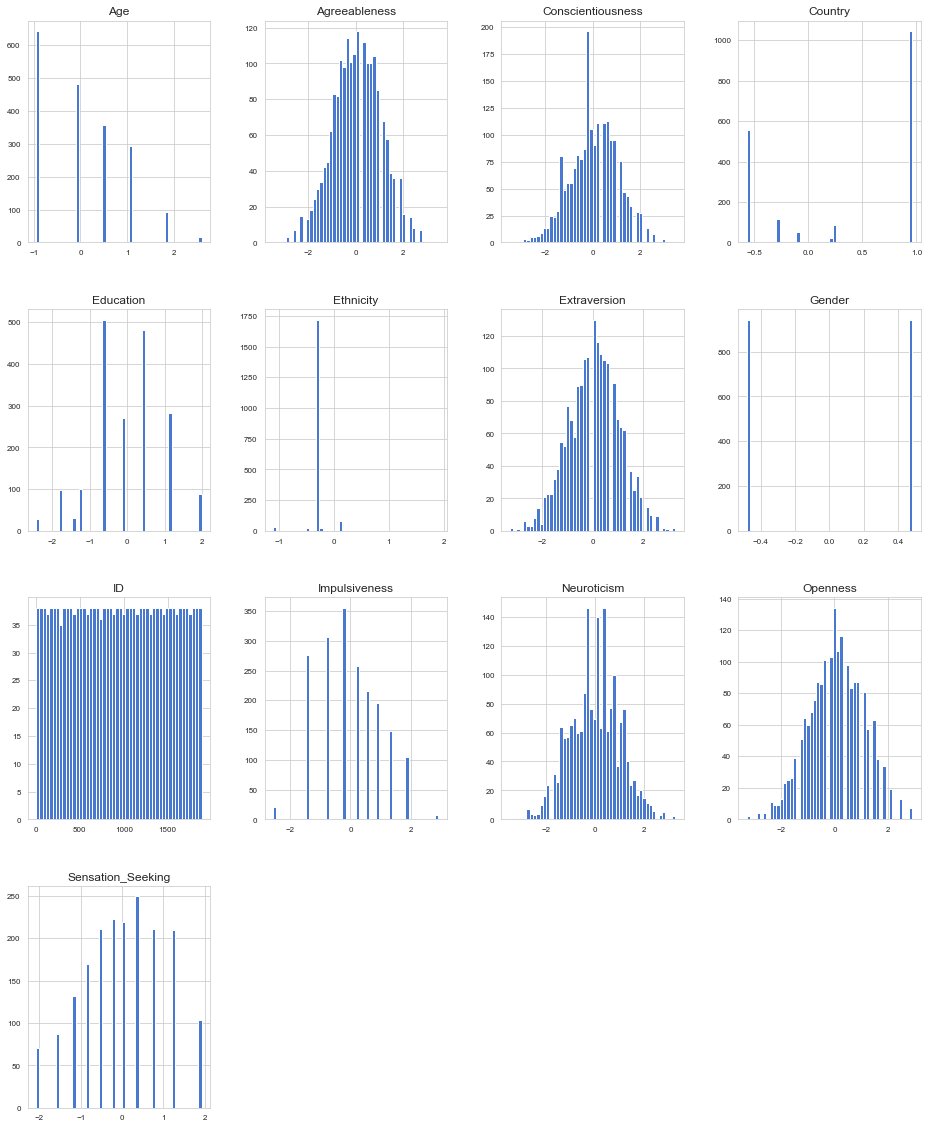

In [10]:
plot_hist_numeric(drugs, figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Demografic Data

The columns containing the demografic data of our interest are ```age```, ```gender``` and ```education``` 

In [11]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education',
]

In [12]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in drugs['Age']]

drugs["Age"] = age

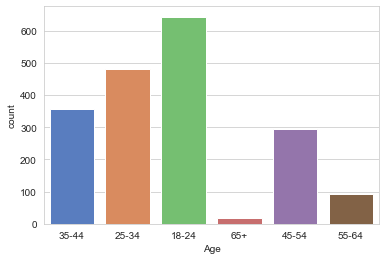

In [13]:
sns.countplot(x='Age', data=drugs)

In [14]:
gender = ['Female' if g > 0 else "Male" for g in drugs['Gender']]

drugs["Gender"] = gender

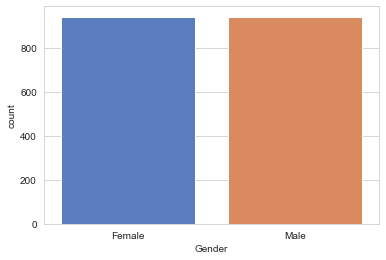

In [15]:
sns.countplot(x='Gender', data=drugs)

In [16]:
education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in drugs['Education']]

drugs["Education"] = education

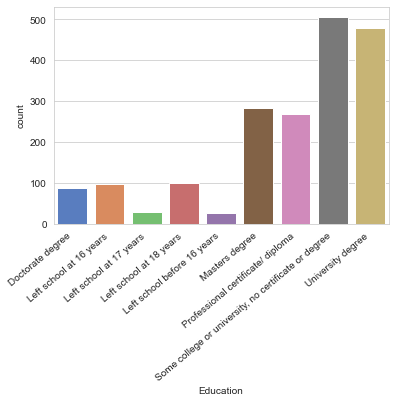

In [17]:
edu_plot = sns.countplot(x='Education', data=drugs.sort_values(by=['Education']))
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right")
edu_plot

## Drug data

### Handling the ```semer``` variable

In [18]:
semer = drugs[drugs['Semer'] != "CL0"]
semer

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
727,730,25-34,Female,Left school at 16 years,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,18-24,Male,"Some college or university, no certificate or ...",-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,18-24,Male,"Some college or university, no certificate or ...",-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,18-24,Female,"Some college or university, no certificate or ...",-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,35-44,Female,University degree,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,18-24,Male,Left school at 18 years,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,18-24,Female,Left school at 17 years,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,18-24,Female,University degree,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


Drop all rows containing Semer as a drug used

In [19]:
drugs = drugs[drugs['Semer'] == "CL0"]

In [20]:
drugs.shape

(1877, 32)

Drop the whole column

In [21]:
drugs = drugs.drop("Semer", axis=1)

In [22]:
drugs.shape

(1877, 31)

In [23]:
drugs_columns = [
    'Alcohol',
    'Amphet',
    'Amyl',
    'Benzos',
    'Caff',
    'Cannabis',
    'Choc',
    'Coke',
    'Crack',
    'Ecstasy',
    'Heroin',
    'Ketamine',
    'Legalh',
    'LSD',
    'Meth',
    'Shrooms',
    'Nicotine',
    'VSA'
]

for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: int(x[-1]))
 

In [24]:
for i in drugs_columns:
    drugs[i] = drugs[i].apply(lambda x: 0 if x <3 else 1)

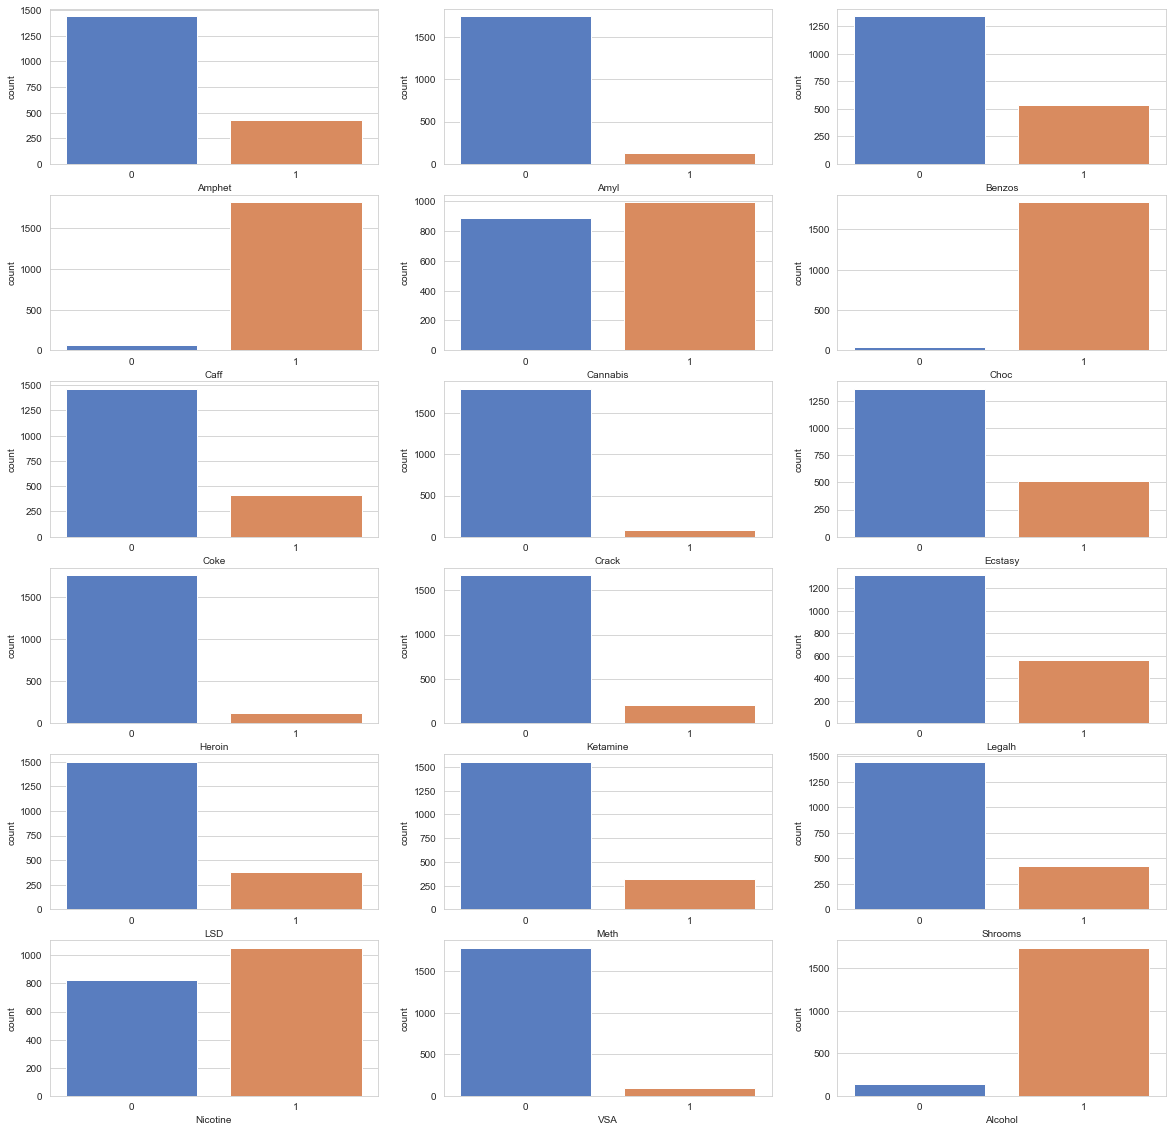

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(20,20))


f1 = sns.countplot(x='Amphet', data=drugs, ax=ax[0,0]);
f1.set_xticks(range(0, 2))

f2 = sns.countplot(x='Amyl', data=drugs, ax=ax[0,1])
f2.set_xticks(range(0, 2))

f3 = sns.countplot(x='Benzos', data=drugs, ax=ax[0,2])
f3.set_xticks(range(0, 2))


f4 = sns.countplot(x='Caff', data=drugs, ax=ax[1,0])
f4.set_xticks(range(0, 2))

f5 = sns.countplot(x='Cannabis', data=drugs, ax=ax[1,1])
f5.set_xticks(range(0, 2))

f6 = sns.countplot(x='Choc', data=drugs, ax=ax[1,2])
f6.set_xticks(range(0, 2))


f7 = sns.countplot(x='Coke', data=drugs, ax=ax[2,0])
f7.set_xticks(range(0, 2))

f8 = sns.countplot(x='Crack', data=drugs, ax=ax[2,1])
f8.set_xticks(range(0, 2))

f9 = sns.countplot(x='Ecstasy', data=drugs, ax=ax[2,2])
f9.set_xticks(range(0, 2))


f10 = sns.countplot(x='Heroin', data=drugs, ax=ax[3,0])
f10.set_xticks(range(0, 2))

f11 = sns.countplot(x='Ketamine', data=drugs, ax=ax[3,1])
f11.set_xticks(range(0, 2))

f12 = sns.countplot(x='Legalh', data=drugs, ax=ax[3,2])
f12.set_xticks(range(0, 2))


f13 = sns.countplot(x='LSD', data=drugs, ax=ax[4,0])
f13.set_xticks(range(0, 2))

f14 = sns.countplot(x='Meth', data=drugs, ax=ax[4,1])
f14.set_xticks(range(0, 2))

f15 = sns.countplot(x='Shrooms', data=drugs, ax=ax[4,2])
f15.set_xticks(range(0, 2))


f16 = sns.countplot(x='Nicotine', data=drugs, ax=ax[5,0])
f16.set_xticks(range(0, 2))


f17 = sns.countplot(x='VSA', data=drugs, ax=ax[5,1])
f17.set_xticks(range(0, 2))

f18 = sns.countplot(x='Alcohol', data=drugs, ax=ax[5,2])
f18.set_xticks(range(0, 2))

## Adding new drug columns

In [26]:
drugs = drugs.drop("Choc", axis=1)
drugs = drugs.drop("Caff", axis=1)

In [27]:
drugs.shape

(1877, 29)

In [28]:
legal_drug = []




for alc, nic in zip(drugs["Alcohol"].tolist(), drugs["Nicotine"].tolist()):
    if alc == 1 or nic == 1:
        legal_drug.append(1)
    else:
        legal_drug.append(0)

In [29]:
drugs["legal_drugs"] = legal_drug

In [30]:
illlegal_drug = []



In [31]:
df_temp = drugs

df_temp = df_temp.drop("Alcohol", axis=1)

df_temp = df_temp.drop("Nicotine", axis=1)

In [32]:
df_temp = df_temp.drop("legal_drugs", axis=1)

In [33]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1877 non-null   int64  
 1   Age                1877 non-null   object 
 2   Gender             1877 non-null   object 
 3   Education          1877 non-null   object 
 4   Country            1877 non-null   float64
 5   Ethnicity          1877 non-null   float64
 6   Neuroticism        1877 non-null   float64
 7   Extraversion       1877 non-null   float64
 8   Openness           1877 non-null   float64
 9   Agreeableness      1877 non-null   float64
 10  Conscientiousness  1877 non-null   float64
 11  Impulsiveness      1877 non-null   float64
 12  Sensation_Seeking  1877 non-null   float64
 13  Amphet             1877 non-null   int64  
 14  Amyl               1877 non-null   int64  
 15  Benzos             1877 non-null   int64  
 16  Cannabis           1877 

In [34]:
df_temp["illegal_drugs"] = df_temp.iloc[:, 13:].sum(axis=1)

In [35]:
df_temp["illegal_drugs"] = df_temp["illegal_drugs"].apply(lambda x: 0 if x<1 else 1)

In [36]:
drugs = pd.concat([df_temp["illegal_drugs"], drugs], axis=1)

In [37]:
drugs.columns

Index(['illegal_drugs', 'ID', 'Age', 'Gender', 'Education', 'Country',
       'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_Seeking', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine',
       'VSA', 'legal_drugs'],
      dtype='object')

## Personality Data

In [38]:
#Renaming Personality trait columns
drugs=drugs.rename(columns={"Escore":"Extraversion", "Nscore":"Neuroticism", "Oscore":"Openness", 
                      "Ascore":"Agreeableness","Cscore":"Conscientiousness", "Impulsive":"Impulsiveness",
                     "SS":"Sensation_Seeking"})

In [39]:
personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation_Seeking'
]

In [40]:
# create personality dataframe
df_personality = drugs[['Neuroticism','Extraversion','Openness','Agreeableness',
                      'Conscientiousness','Impulsiveness','Sensation_Seeking']]

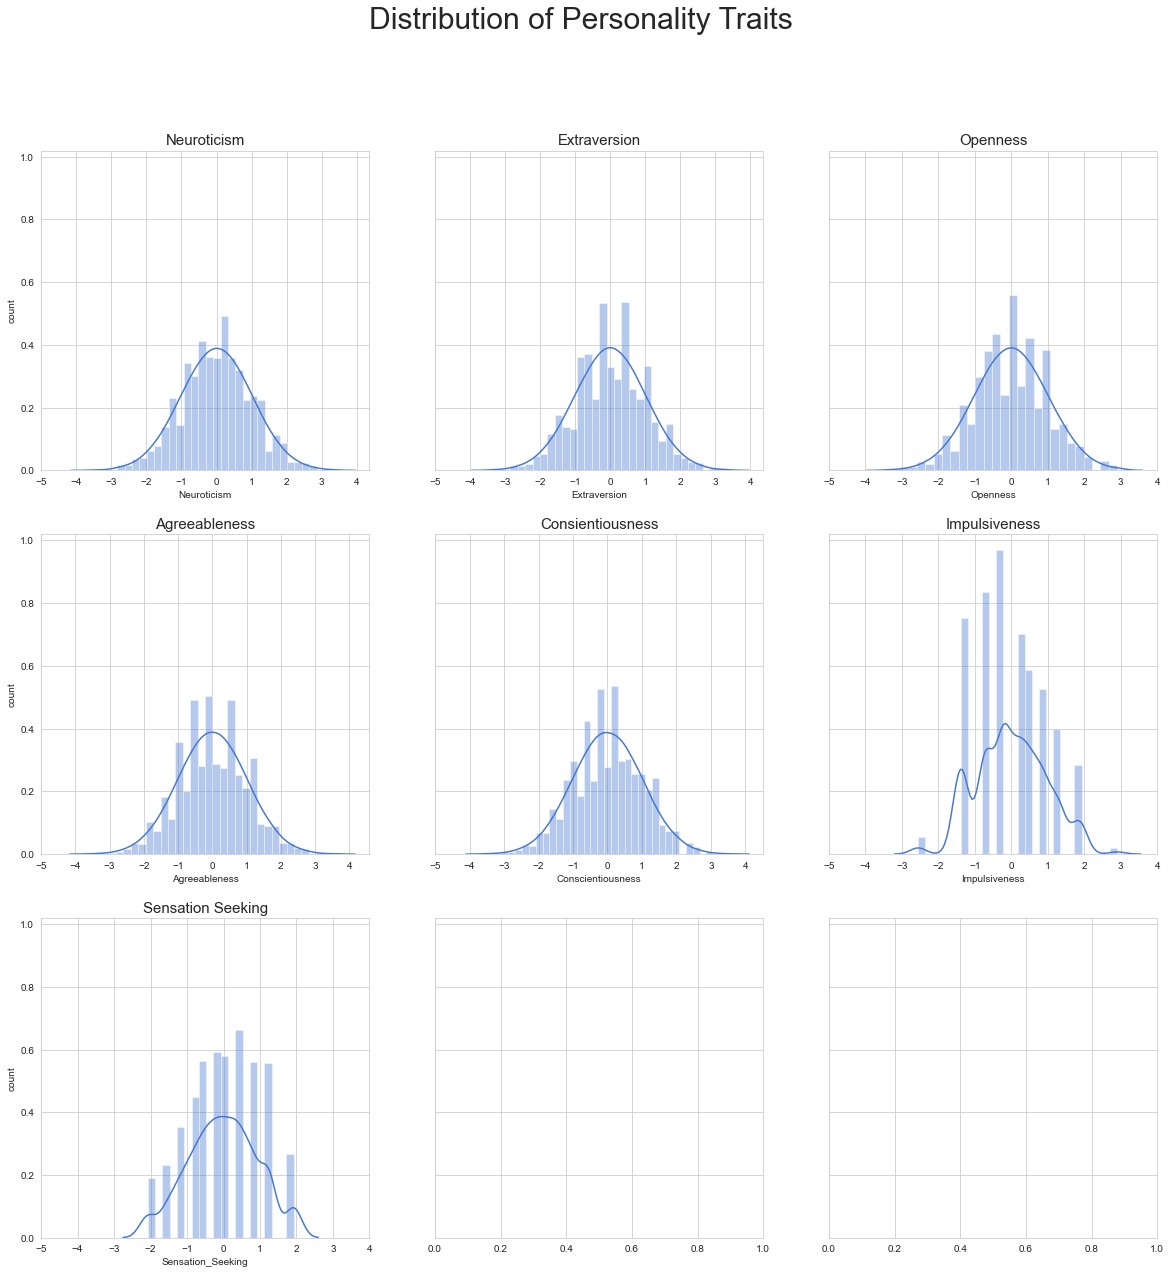

In [42]:
fig, ax = plt.subplots(ncols=3, nrows=3,sharex=False,sharey=True, figsize=(20,20))
plt.suptitle("Distribution of Personality Traits", fontsize = 30)

f1 = sns.distplot(drugs.Neuroticism, ax=ax[0,0]);
f1.set_xticks(range(-5, 5));
f1.set_title("Neuroticism", fontsize = 15);
f1.set_ylabel("count");

f2 = sns.distplot(drugs.Extraversion, ax=ax[0,1]);
f2.set_title("Extraversion", fontsize = 15);
f2.set_xticks(range(-5, 5));
#f2.set_ylabel("count");

f3 = sns.distplot(drugs.Openness, ax=ax[0,2]);
f3.set_title("Openness", fontsize = 15);
f3.set_xticks(range(-5, 5));
#f3.set_ylabel("count");

f4 = sns.distplot(drugs.Agreeableness, ax=ax[1,0]);
f4.set_title("Agreeableness", fontsize = 15);
f4.set_xticks(range(-5, 5));
f4.set_ylabel("count");

f5 = sns.distplot(drugs.Conscientiousness, ax=ax[1,1]);
f5.set_title("Consientiousness", fontsize = 15);
f5.set_xticks(range(-5, 5));
#f5.set_ylabel("count");

f6 = sns.distplot(drugs.Impulsiveness,ax=ax[1,2]);
f6.set_title("Impulsiveness", fontsize = 15);
f6.set_xticks(range(-5, 5));
#f6.set_ylabel("count");

f7 = sns.distplot(drugs.Sensation_Seeking, ax=ax[2,0]);
f7.set_title("Sensation Seeking", fontsize = 15);
f7.set_xticks(range(-5, 5));
f7.set_ylabel("count");

At first glance, personality traits seem to be normally distributed.

In [43]:
# Claculacte skew
rows_skew = [[trait, skew(df_personality[trait])] for trait in df_personality]
df_skew = pd.DataFrame(rows_skew, columns=["Trait", "Skew"])
df_skew

,Trait,Skew
0,Neuroticism,-0.003104
1,Extraversion,-0.000808
2,Openness,-0.008422
3,Agreeableness,-0.005468
4,Conscientiousness,-0.004424
5,Impulsiveness,0.077104
6,Sensation_Seeking,-0.042360


Skew-Values are close to zero, which means the traits are close to normally distributed

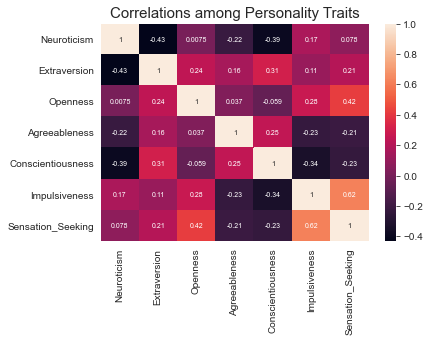

In [44]:
# Checking for intercorrelations
sns.heatmap(df_personality.corr(), annot=True, annot_kws={"size": 7});
plt.title("Correlations among Personality Traits", fontsize=15);

# Checking Assumptions

## Assumptions 1 and 2: Personality&Drugs

In [45]:
# Check correlations between personality traits and drug use
# First, create df with only personality traits and drug use
df_perso_drug = pd.concat([drugs[["illegal_drugs", "legal_drugs"]], df_personality], axis=1)

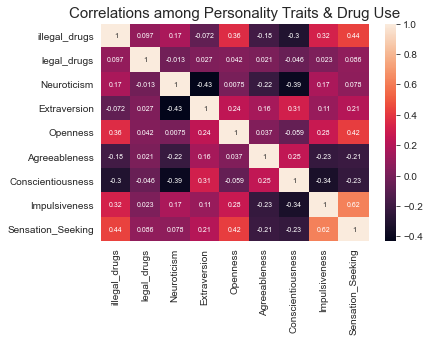

In [46]:
sns.heatmap(df_perso_drug.corr(), annot=True, annot_kws={"size": 7});
plt.title("Correlations among Personality Traits & Drug Use", fontsize=15);

**Assumption 1:** As expected, we see different personality traits to be correlated with drug abuse.

For illegal drug use, ```Openness to Experience``` and ```Sensation Seeking``` have low, but noteworhty correlations with drug abuse.

For legal drug use, no noteworthy correlations exist.

**Assumption 2:** As expected, ```Sensation Seeking``` has the highest correlation with illegal drug abuse. 

## Assumption 5: Personality, Gender and Drug Use

### Personality and Gender

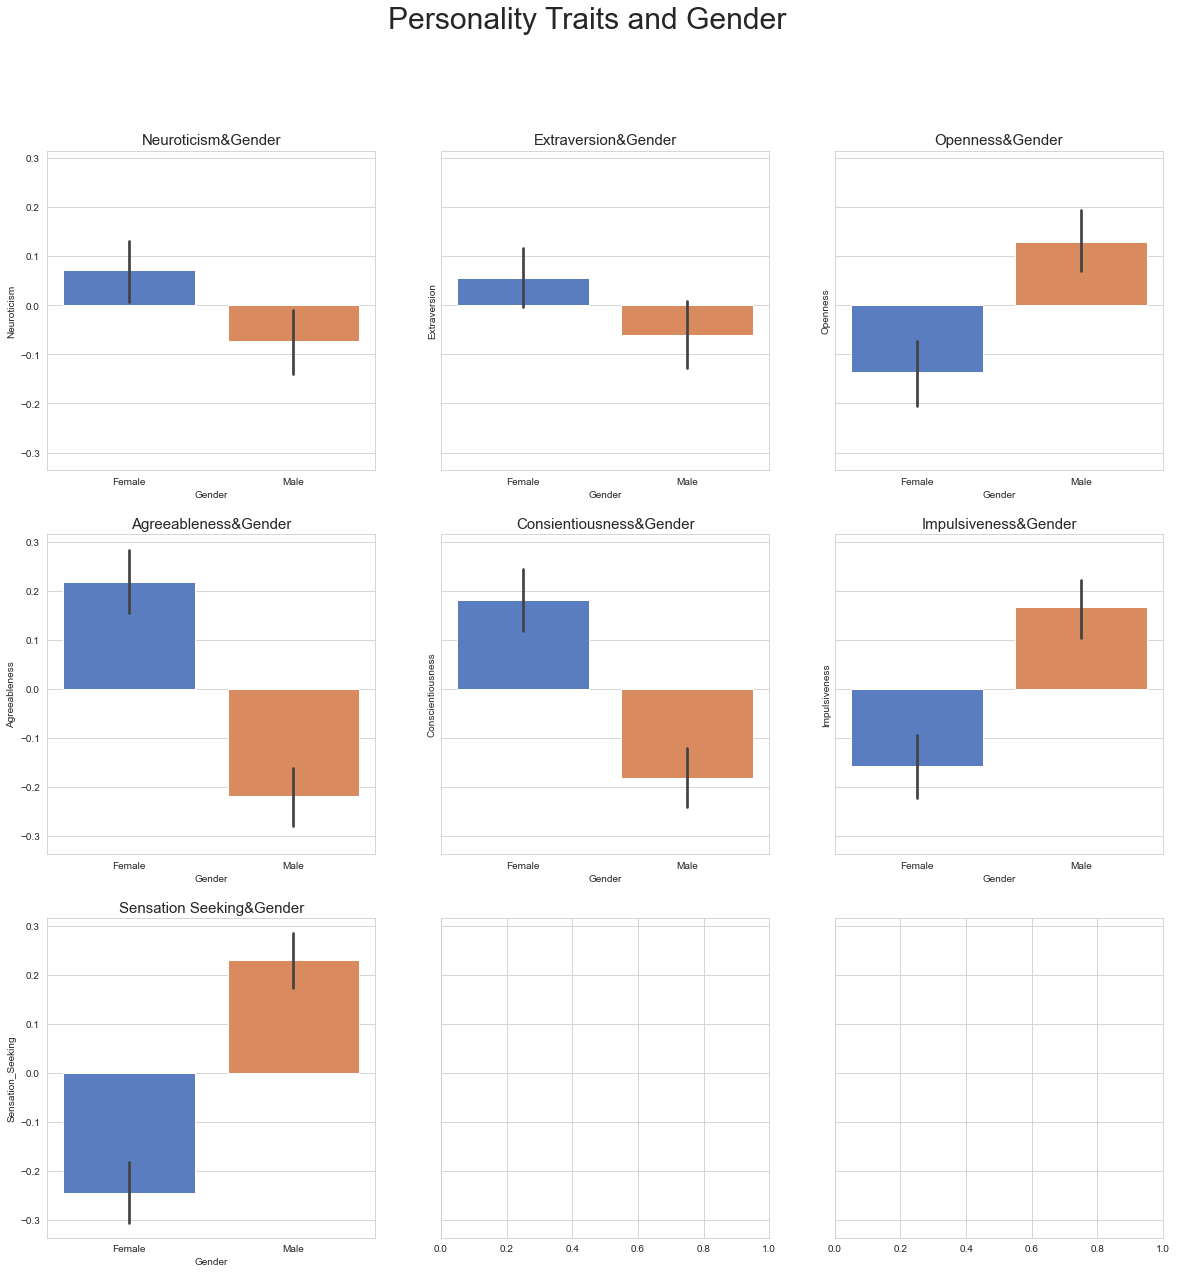

In [49]:
fig, ax = plt.subplots(ncols=3, nrows=3,sharex=False,sharey=True, figsize=(20,20))
plt.suptitle("Personality Traits and Gender", fontsize = 30)

f1 = sns.barplot(y=drugs.Neuroticism, x=drugs.Gender, ax=ax[0,0]);
#f1.set_xticks(range(-5, 5));
f1.set_title("Neuroticism&Gender", fontsize = 15);
#f1.set_ylabel("count");

f2 = sns.barplot(y=drugs.Extraversion,x=drugs.Gender, ax=ax[0,1]);
f2.set_title("Extraversion&Gender", fontsize = 15);
#f2.set_xticks(range(-5, 5));
#f2.set_ylabel("count");

f3 = sns.barplot(y=drugs.Openness, x=drugs.Gender, ax=ax[0,2]);
f3.set_title("Openness&Gender", fontsize = 15);
#f3.set_xticks(range(-5, 5));
#f3.set_ylabel("count");

f4 = sns.barplot(y=drugs.Agreeableness,x=drugs.Gender, ax=ax[1,0]);
f4.set_title("Agreeableness&Gender", fontsize = 15);
#f4.set_xticks(range(-5, 5));
#f4.set_ylabel("count");

f5 = sns.barplot(y=drugs.Conscientiousness,x=drugs.Gender, ax=ax[1,1]);
f5.set_title("Consientiousness&Gender", fontsize = 15);
#f5.set_xticks(range(-5, 5));
#f5.set_ylabel("count");

f6 = sns.barplot(y=drugs.Impulsiveness,x=drugs.Gender, ax=ax[1,2]);
f6.set_title("Impulsiveness&Gender", fontsize = 15);
#f6.set_xticks(range(-5, 5));
#f6.set_ylabel("count");

f7 = sns.barplot(y=drugs.Sensation_Seeking, x=drugs.Gender, ax=ax[2,0]);
f7.set_title("Sensation Seeking&Gender", fontsize = 15);
#f7.set_xticks(range(-5, 5));
#f7.set_ylabel("count");


As a result, we see clear gender differences in certain personality traits.

As expected, ```Sensation Seeking``` is higher in men.<br/>

### Drug abuse and Gender

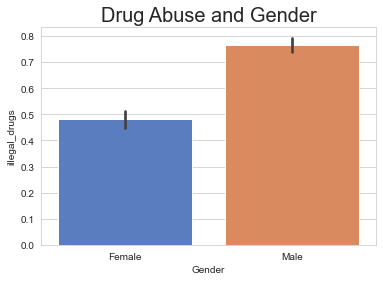

In [50]:
sns.barplot(y=drugs["illegal_drugs"], x=drugs.Gender);
plt.title("Drug Abuse and Gender", fontsize = 20);

Drug abuse is higher in men.

**Assumption 5:** Since ```Sensation Seeking``` is higher in men and ```Sensation Seeking``` shows the highest correlation to drug abuse among personality traits, the differences in drug abuse in men and women seem to potentionally can be explained by gender differences in ```Sensation Seeking```. 